In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:

X_test.shape
 

(10000, 28, 28)

In [7]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

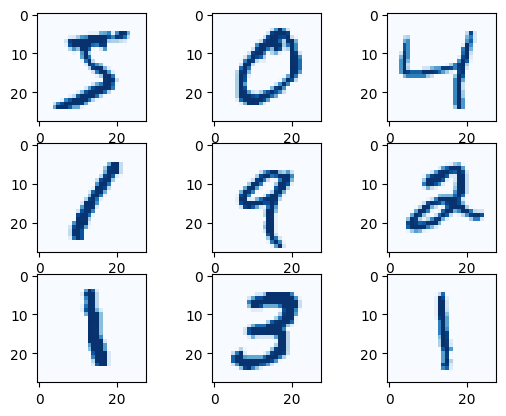

In [11]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('Blues'))
plt.show()

In [12]:
X_train_r = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[2], 1)
     

In [13]:
X_test_r = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[2], 1)
     
X_train_r = tf.keras.utils.normalize(X_train_r, axis = 1)
     
X_test_r = tf.keras.utils.normalize(X_test_r, axis = 1)

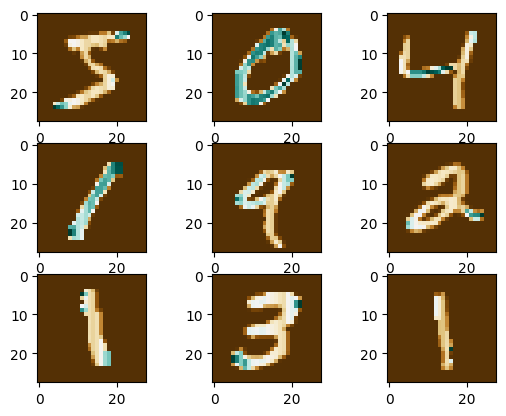

In [23]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(np.squeeze(X_train_r[i]), cmap=plt.get_cmap('BrBG'))
plt.show()

In [24]:
image_shape = X_train_r.shape[1:]

In [25]:
print(image_shape)

(28, 28, 1)


In [26]:
model = model = tf.keras.models.Sequential()
     
model.add(tf.keras.layers.Conv2D(48, (3,3), activation = tf.nn.relu, input_shape = image_shape))
     
model.add(tf.keras.layers.MaxPool2D((2,2)))
     
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu))

In [27]:
model.add(tf.keras.layers.MaxPool2D((2,2)))
     
model.add(tf.keras.layers.Dropout(0.5))
     
model.add(tf.keras.layers.Flatten())
     
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
     
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [28]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_r, Y_train, epochs = 5)
     

Epoch 1/5
1875/1875 [==============================] - 92s 48ms/step - loss: 0.1887 - accuracy: 0.9404
Epoch 2/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.0735 - accuracy: 0.9773
Epoch 3/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0544 - accuracy: 0.9825
Epoch 4/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0440 - accuracy: 0.9857
Epoch 5/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0379 - accuracy: 0.9879


In [29]:
model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 48)        480       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        27712     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

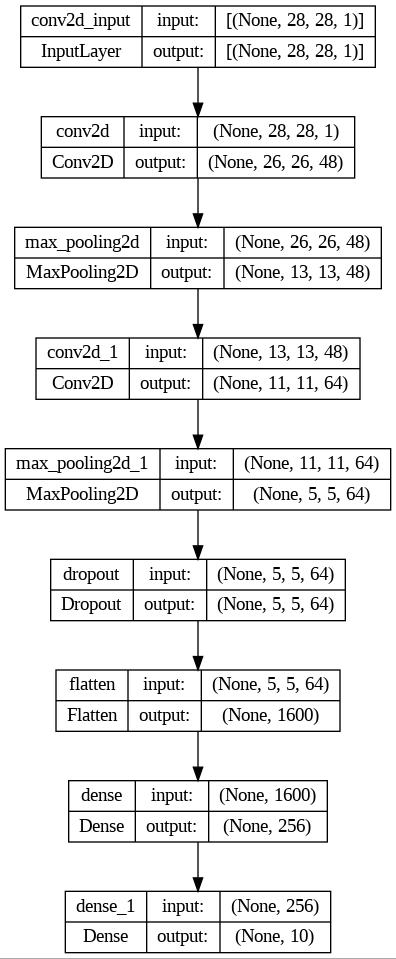

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes = True)

In [31]:
val_loss, val_accuracy = model.evaluate(X_test, Y_test)
print("Validation loss : ", val_loss*100, "%")
print("Validation accuracy : ", val_accuracy*100,"%")

313/313 [==============================] - 6s 19ms/step - loss: 16.2494 - accuracy: 0.9820
Validation loss :  1624.941635131836 %
Validation accuracy :  98.19999933242798 %


In [32]:
model.save('/content/drive/MyDrive/Machine Learning Projects/Mnist.model')

In [33]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Machine Learning Projects/Mnist.model")
     

313/313 [==============================] - 4s 14ms/step


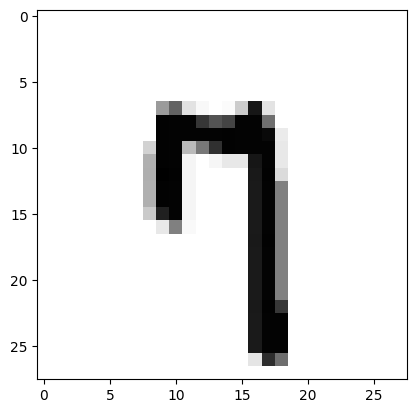

In [36]:
predictions = new_model.predict(X_test)
plt.imshow(X_test[80], cmap = plt.get_cmap('Greys'))

In [37]:
print("The prediction is : ", np.argmax(predictions[80]))

The prediction is :  7
